In [56]:
import pandas as pd

In [57]:
lie=pd.read_csv("liedetector.csv")

In [58]:
lie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1372 non-null   object 
 1   X2      1372 non-null   float64
 2   X3      1372 non-null   float64
 3   X4      1372 non-null   float64
 4   X5      1372 non-null   float64
 5   X6      1372 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 64.4+ KB


In [59]:
lie['X1'].nunique()

1372

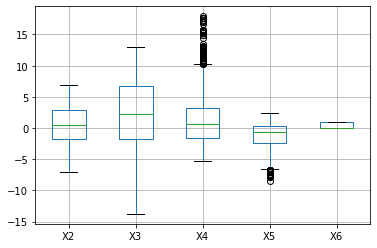

In [27]:
lie.boxplot()

In [28]:
import seaborn as sns
import matplotlib

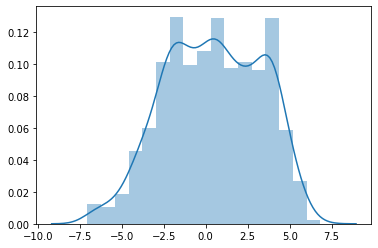

In [34]:
sns.distplot(lie[['X2']])

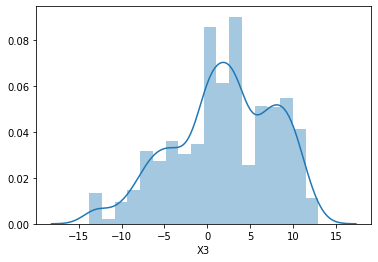

In [35]:
sns.distplot(lie['X3'])

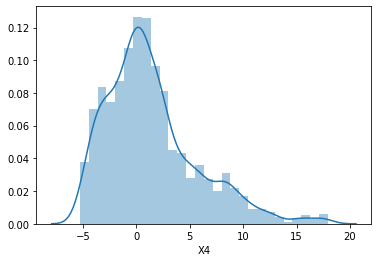

In [36]:
sns.distplot(lie['X4'])

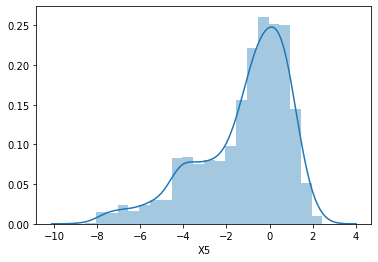

In [37]:
sns.distplot(lie['X5'])

In [38]:
from scipy.stats import shapiro

In [45]:
lie.describe()

,X2,X3,X4,X5,X6
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433665,1.922353,1.397627,-1.191657,0.406706
std,2.842766,5.869047,4.310030,2.101013,0.491398
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [51]:
lie.mode()['X2'][0]

0.5706

In [52]:
lie['X2'].value_counts()

 0.57060    5
 0.51950    4
 0.32920    4
 0.37980    4
-0.20620    3
           ..
 3.26970    1
-0.56877    1
-4.36670    1
 4.65000    1
-3.31250    1
Name: X2, Length: 1338, dtype: int64

In [53]:
lie['X3'].value_counts()

-4.45520    6
-3.26330    5
 0.70980    4
-0.02480    4
-3.79710    4
           ..
-7.83220    1
 2.90730    1
 3.32530    1
 2.14380    1
 0.80287    1
Name: X3, Length: 1256, dtype: int64

In [54]:
lie['X4'].value_counts()

 4.5718    5
 3.0895    5
 1.2421    5
 0.7572    4
-3.7044    3
          ..
 1.9079    1
 3.0141    1
-2.7473    1
-3.8081    1
-2.9375    1
Name: X4, Length: 1270, dtype: int64

In [55]:
lie['X5'].value_counts()

-0.295700    5
-0.988800    5
-0.237510    4
-7.503400    4
 0.361190    4
            ..
-5.064600    1
 0.008175    1
-2.160300    1
 0.027572    1
 1.187500    1
Name: X5, Length: 1156, dtype: int64

In [47]:
lie.mode()['X3'][0]

-4.4552

In [48]:
lie.mode()['X4'][0]

1.2421

In [49]:
lie.mode()['X5'][0]

-0.9888

In [44]:
stat, p = shapiro(lie['X5'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.915, p=0.000


In [68]:
lie=lie.drop("X1",axis=1)

In [6]:
lie

,X2,X3,X4,X5,X6
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.23230,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,0
1368,-1.38870,-4.87730,6.4774,0.34179,0
1369,-3.75030,-13.45860,17.5932,-2.77710,0
1370,-3.56370,-8.38270,12.3930,-1.28230,0


In [ ]:
lie

In [60]:
import statsmodels.formula.api as sm

In [61]:
formula='X6~X2+X3+X4+X5'

In [62]:
Logistic = sm.logit(formula=formula,data=lie).fit()

Optimization terminated successfully.
         Current function value: 0.433422
         Iterations 6


In [63]:
Logistic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     X6   No. Observations:                 1372
Model:                          Logit   Df Residuals:                     1367
Method:                           MLE   Df Model:                            4
Date:                Sun, 21 Mar 2021   Pseudo R-squ.:                  0.3585
Time:                        16:41:03   Log-Likelihood:                -594.65
converged:                       True   LL-Null:                       -926.97
Covariance Type:            nonrobust   LLR p-value:                1.580e-142
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7313      0.106      6.920      0.000       0.524       0.938
X2            -0.5521      0.034    -16.037      0.000      -0.620      -0.485
X3            -0.2892      0.024    -11.892      0.000      -0.337      -0.242
X4            -0.3820      0.028    -13.545      0.000      -0.437      -0.327
X5             0.0457      0.046      0.982      0.326      -0.045       0.137
==============================================================================
"""

In [66]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [69]:
vif_cal(input_data=lie.drop('X6',axis=1))

X2  VIF =  1.53
X3  VIF =  3.5
X4  VIF =  2.87
X5  VIF =  1.86


In [70]:
from sklearn import metrics

In [13]:
formula_1='X6~X2+X3+X4'

In [14]:
Logistic_1 = sm.logit(formula=formula_1,data=lie).fit()
Logistic_1.summary()

Optimization terminated successfully.
         Current function value: 0.433774
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     X6   No. Observations:                 1372
Model:                          Logit   Df Residuals:                     1368
Method:                           MLE   Df Model:                            3
Date:                Sun, 21 Mar 2021   Pseudo R-squ.:                  0.3580
Time:                        15:09:35   Log-Likelihood:                -595.14
converged:                       True   LL-Null:                       -926.97
Covariance Type:            nonrobust   LLR p-value:                1.581e-143
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6905      0.097      7.148      0.000       0.501       0.880
X2            -0.5368      0.030    -17.611      0.000      -0.597      -0.477
X3            -0.2996      0.022    -13.617      0.000      -0.343      -0.257
X4            -0.3833      0.028    -13.560      0.000      -0.439      -0.328
==============================================================================
"""

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
Train,Test = train_test_split(lie,test_size=0.3,random_state=1,stratify=lie['X6'])

In [21]:
Train.shape

(960, 5)

In [23]:
Test.shape

(412, 5)

In [28]:
Train['X6'].value_counts(normalize=True)

0    0.59375
1    0.40625
Name: X6, dtype: float64

In [29]:
Test['X6'].value_counts(normalize=True)

0    0.592233
1    0.407767
Name: X6, dtype: float64

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
LR = LogisticRegression(solver='newton-cg',penalty='none')

In [33]:
# model = LR.fit(Train[['X2','X3','X4']],Train['X6'])

In [82]:
model = LR.fit(lie[['X2','X3','X4','X5']],lie['X6'])

In [35]:
#model.score(Train[['X2','X3','X4']],Train['X6'])

0.8520833333333333

In [18]:
model.score(lie[['X2','X3','X4']],lie['X6'])

0.8483965014577259

In [36]:
Test

,X2,X3,X4,X5,X6
225,1.3562,3.21360,4.34650,0.78662,0
805,-3.6085,3.32530,-0.51954,-3.57370,1
659,2.1881,2.73560,1.32780,-0.18320,0
24,4.4338,9.88700,-4.67950,-3.74830,0
303,-1.9177,11.68940,2.54540,-3.27630,0
...,...,...,...,...,...
1308,-4.6338,-12.75090,16.71660,-3.21680,0
595,3.1836,7.23210,-1.07130,-2.59090,1
874,-2.7990,1.96790,-0.42357,-2.11250,1
591,1.5268,-5.58710,8.65640,-1.72200,0


In [40]:
#model_test_class = model.predict(Test[['X2','X3','X4']])

In [83]:
model_class = model.predict(lie[['X2','X3','X4','X5']])

In [41]:
#model_test_prob = model.predict_proba(Test[['X2','X3','X4']])

In [76]:
model_prob = model.predict_proba(lie[['X2','X3','X4','X5']])

In [84]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [85]:
confusion_matrix(lie['X6'], model_class)

array([[674, 140],
       [ 78, 480]], dtype=int64)

In [93]:
print(classification_report(lie['X6'], model_class))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       814
           1       0.77      0.86      0.81       558

    accuracy                           0.84      1372
   macro avg       0.84      0.84      0.84      1372
weighted avg       0.85      0.84      0.84      1372



In [96]:
import matplotlib.pyplot as plt

AUC: 0.852


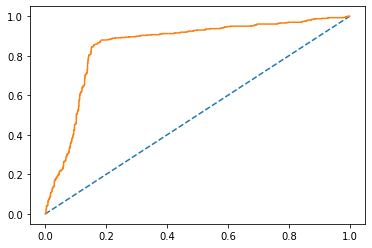

In [97]:
probs = model.predict_proba(lie[['X2','X3','X4','X5']])
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(lie['X6'], probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(lie['X6'], probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

In [86]:
lie['X6'].value_counts(normalize=True)

0    0.593294
1    0.406706
Name: X6, dtype: float64

In [20]:
model_prob

array([[0.94127021, 0.05872979],
       [0.96284148, 0.03715852],
       [0.79114617, 0.20885383],
       ...,
       [0.50171709, 0.49828291],
       [0.40969342, 0.59030658],
       [0.22733538, 0.77266462]])

In [22]:
import numpy as np

In [23]:
np.exp(1.5)

4.4816890703380645

In [87]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [88]:
LDA = LinearDiscriminantAnalysis()

In [89]:
model_1_LDA = LDA.fit(lie[['X2','X3','X4','X5']],lie['X6'])

In [90]:
model_1_LDA_test_class = model_1_LDA.predict(lie[['X2','X3','X4','X5']])

In [91]:
confusion_matrix(lie['X6'],model_1_LDA_test_class)

array([[669, 145],
       [ 75, 483]], dtype=int64)

In [92]:
print(classification_report(lie['X6'],model_1_LDA_test_class))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       814
           1       0.77      0.87      0.81       558

    accuracy                           0.84      1372
   macro avg       0.83      0.84      0.84      1372
weighted avg       0.85      0.84      0.84      1372



AUC: 0.852


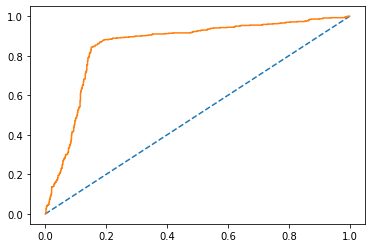

In [98]:
probs = model_1_LDA.predict_proba(lie[['X2','X3','X4','X5']])
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(lie['X6'], probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(lie['X6'], probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

In [ ]:
|